<a href="https://colab.research.google.com/github/tushar-mods/Projects/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA Capstone Project**                   
#                              

##***(Global Terrorism Analysis)*** 
###**by : Tushar Singh**



### <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#**Some Main Key Topics Of our Analysis :-**
####~ ***Overall Recorded Terror Cases***
####~ ***Which are the Countries that have Faced the most Terror***
####~ ***Which were the most targeted cities of Terrorist***s
####~ ***We will also know the visual differeces between the attack and death ratios.***
####~ ***The people who become the most targets of terrorists or say sectors, what are they?***
####~ ***Methods of attack mostly adopted by terrorists.***
####~ ***Weapons used by terrorists during attacks..***
####~ ***Gangs spreading the most Terror..***
####~ ***And according to the data, how much did their terror increase   between some few years?***
####~ ***What was the annual increase in terror between 1970 and 2017?***


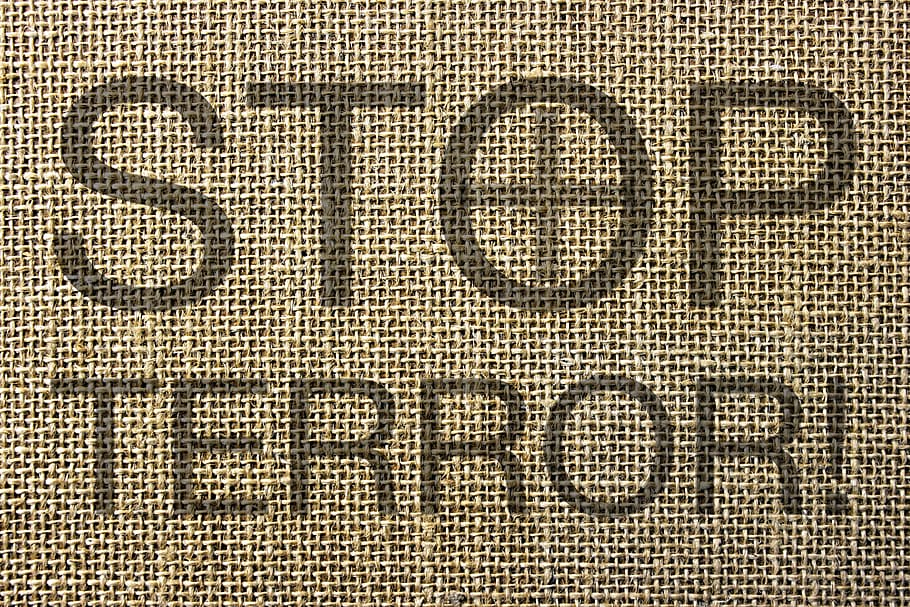

**---Import Libraries---**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**---Import CSV File---**

In [ ]:
os.chdir('/content/')

In [ ]:
df = pd.read_csv("Global Terrorism Data.csv",encoding='latin')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

**---Cleaning and Some Basic Analization---**

In [ ]:
# Size and Shape Of the Given DataFrame

print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [ ]:
# Data Types of Each Columns:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Statistical Analyse:

df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [ ]:
#null counter

df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
# Retitle the Columns:

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',
                     'country_txt':'Country','region_txt':'Region',
                     'attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type',
                     'target1':'Targeted_Obj','gname':'Group','motive':'Motive',
                     'weaptype1_txt':'Weapon_Type','nkill':'Death','nwound':'Wounded'},inplace=True )

# Replace NaN to 0 :

df["Death"] = df["Death"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)

# Concatenate Two Columns :

df["Victim"] = df["Death"] + df["Wounded"]

# Cleaned DataFrame

df=df[['Year','Month','Day','Country','Region','city','longitude','latitude','Group','Attack_Type',
               'Weapon_Type','Target_Type','Victim','Targeted_Obj','Death','Wounded','Motive']]
df.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   longitude   latitude                               Group  \
0  Santo Domingo  -69.951164  18.456792                              MANO-D   
1    Mexico city  -99.086624  19.371887  23rd of September Communist League   
2        Unknown  120.599741  15.478598                             Unknown   
3         Athens   23.762728  37.997490                             Unknown   
4        Fukouka  130.396361  33.580412                             Unknown   

                      Attack_Type Weapon_Type                  Target_Type  \
0                   Assassination     Unknown  Private Citizens & Property   
1     Hostage Taking (Kidnapping)     Unknown      Government (Diplomatic)   
2                   Assassination     Unknown          Journalists & Media   
3               Bombing/Explosion  Explosives      Government (Diplomatic)   
4  Facility/Infrastructure Attack  Incendiary      Government (Diplomatic)   

   Victim             Targeted_Obj  Death  Wounded Motive  
0     1.0             Julio Guzman    1.0      0.0    NaN  
1     0.0  Nadine Chaval, daughter    0.0      0.0    NaN  
2     1.0                 Employee    1.0      0.0    NaN  
3     0.0             U.S. Embassy    0.0      0.0    NaN  
4     0.0           U.S. Consulate    0.0      0.0    NaN

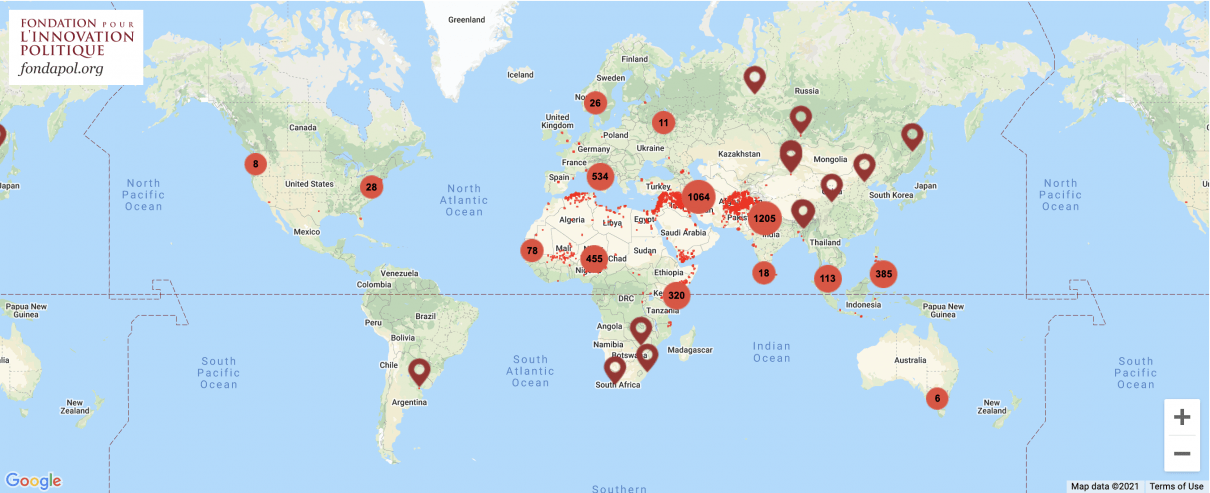
Image Source: fondapol.org

#Total Recorded Terror Attacks

In [ ]:
# Lets find out total recorded Attacks 

Total_attacks = len(df) -1
start_year = df.at[0,'Year']
last_year = df.at[Total_attacks,'Year']
dead=df['Death'].sum()
wounded=df['Wounded'].sum()

print(f'The Terror Attacks recorded between {start_year} and {last_year} are {Total_attacks} ,due to which {dead} people died and {wounded} were injured.' )


The Terror Attacks recorded between 1970 and 2017 are 181690 ,due to which 411868.0 people died and 523869.0 were injured.


#Countries with the Most Terror Attacks :-

In [ ]:
print("#These are some top 10 countries with the most Attacks :- ");print(df['Country'].value_counts().head(10))

#These are some top 10 countries with the most Attacks :- 
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


In [ ]:
colors = ['red',]*30
colors[19]= 'maroon'
x=df['Country'].value_counts()[:20].sort_values().values
y=df['Country'].value_counts()[:20].sort_values().index
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,orientation='h')])
fig.update_layout(title_text='Top Contries with the most Attacks', xaxis_title="Attacks",
    yaxis_title="Countries")

#Cities with the Most Terror Attacks:-

In [ ]:
print("#These are some top cities with the most Attacks :- ");print(df['city'].value_counts().head())

#These are some top cities with the most Attacks :- 
Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64


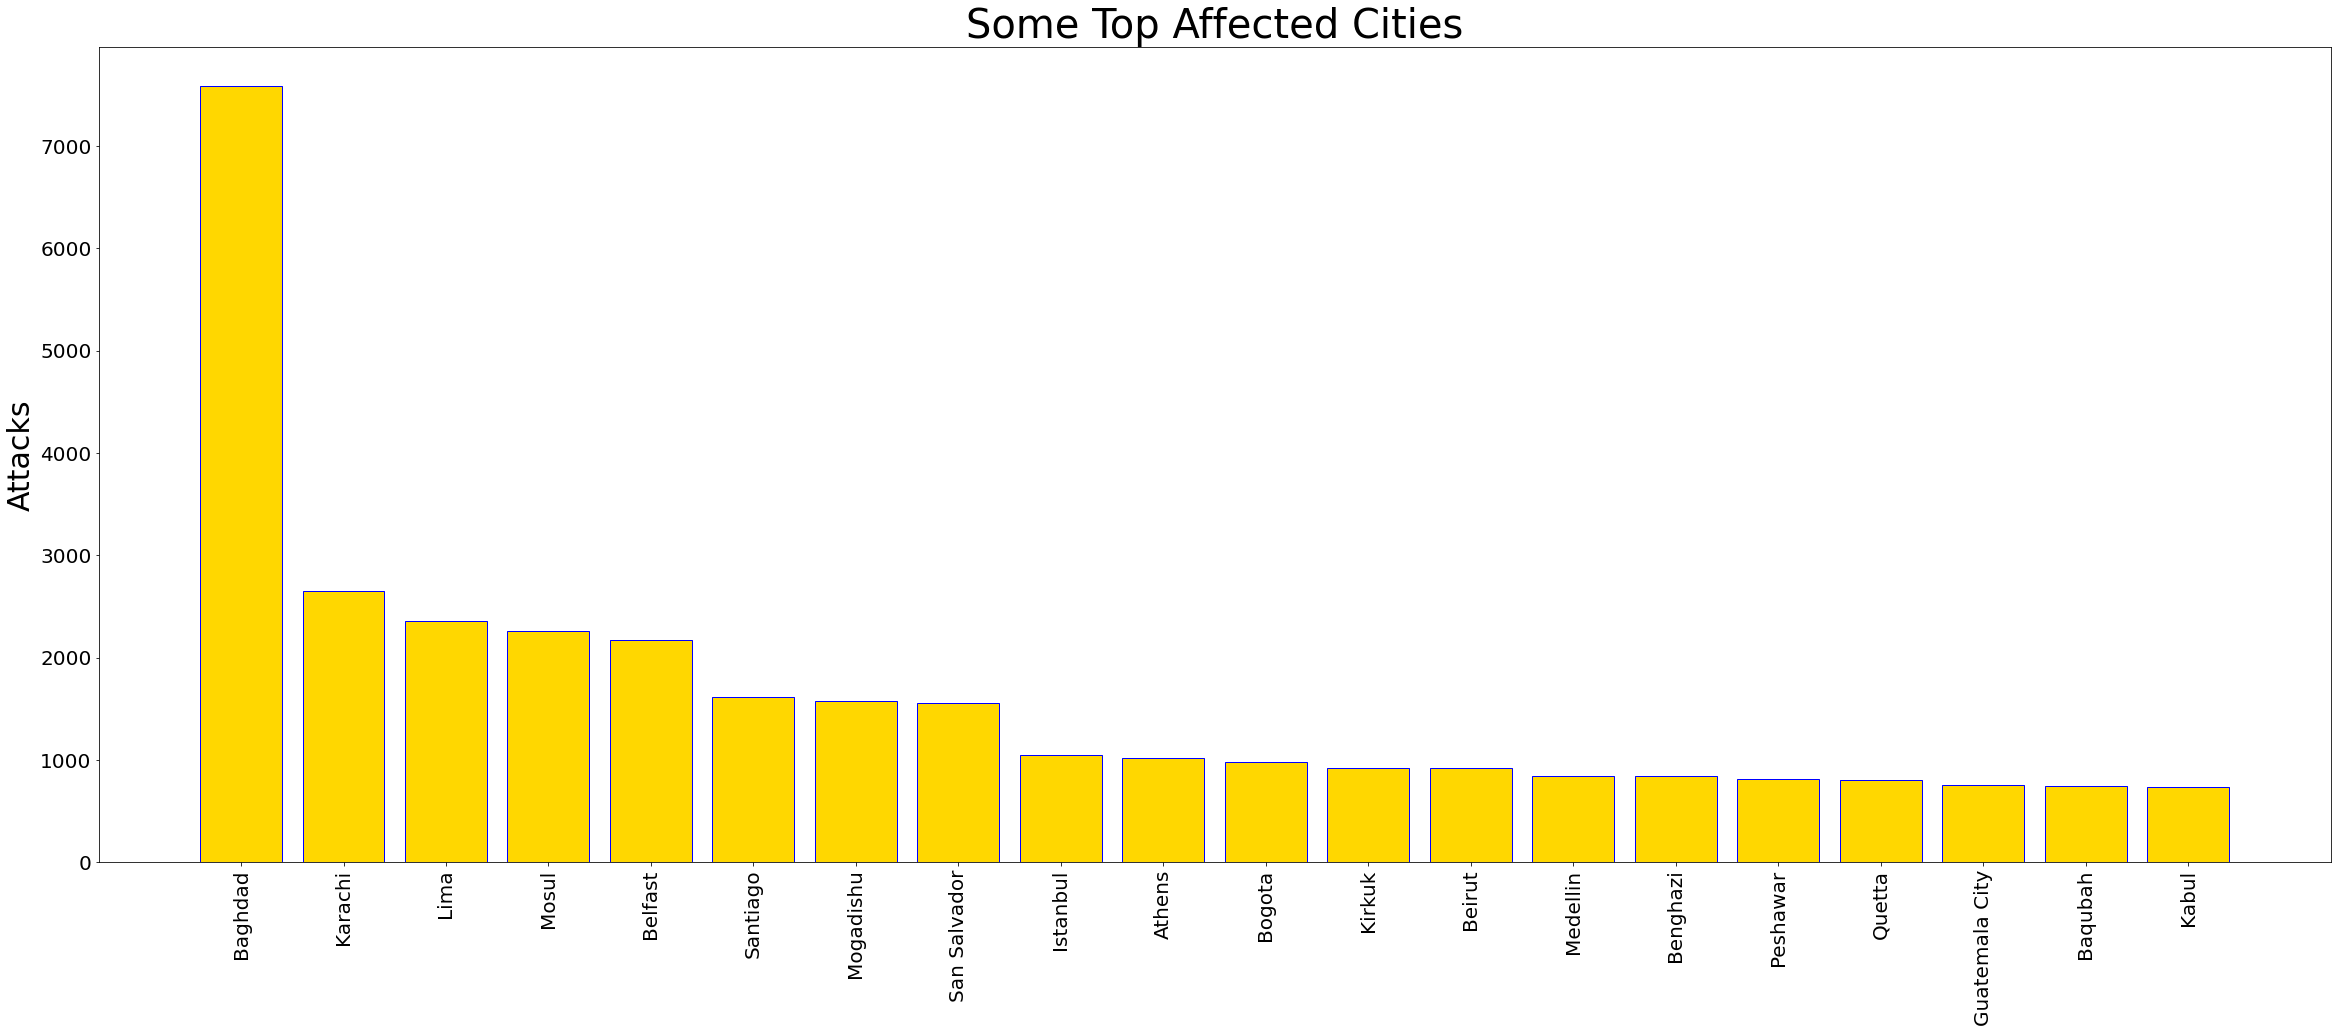

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (40,15))
plt.bar(df["city"].value_counts()[1:21].index,
        height = df["city"].value_counts()[1:21].values,
        color='gold', edgecolor='blue')
plt.xticks(rotation=90)
plt.title("Some Top Affected Cities", fontsize=40)
plt.ylabel("Attacks", fontsize=30)
plt.show()

#Attacks and Death Difference :-

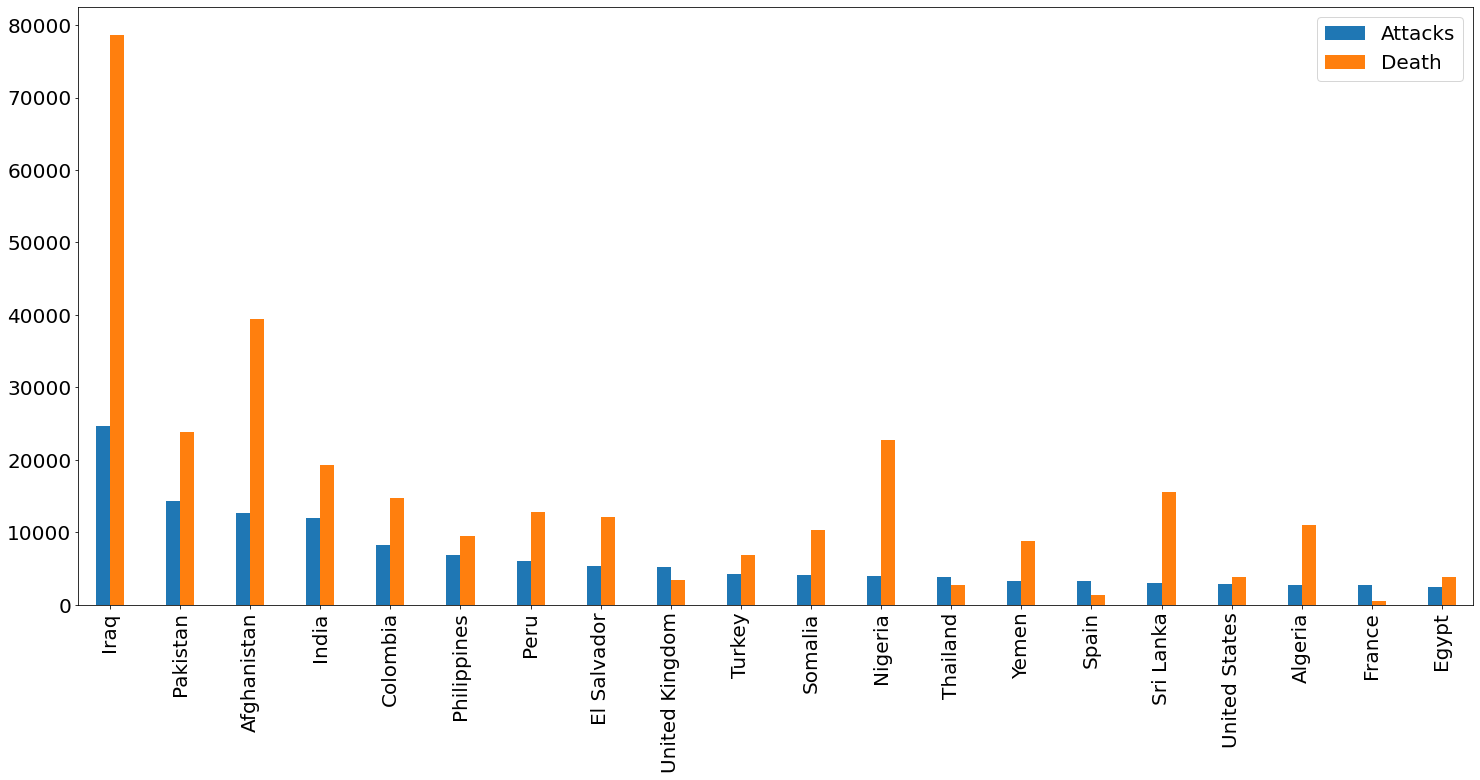

In [ ]:
terror_idx=df['Country'].value_counts()[:20].to_frame()
terror_idx.columns=['Attacks']
kill_idx=df.groupby('Country')['Death'].sum().to_frame()
terror_idx.merge(kill_idx,left_index=True,right_index=True,how='left').plot.bar(width=0.4)
fig=plt.gcf()
fig.set_size_inches(25,11)
plt.show()

#Targeted Sectors or Peoples :-

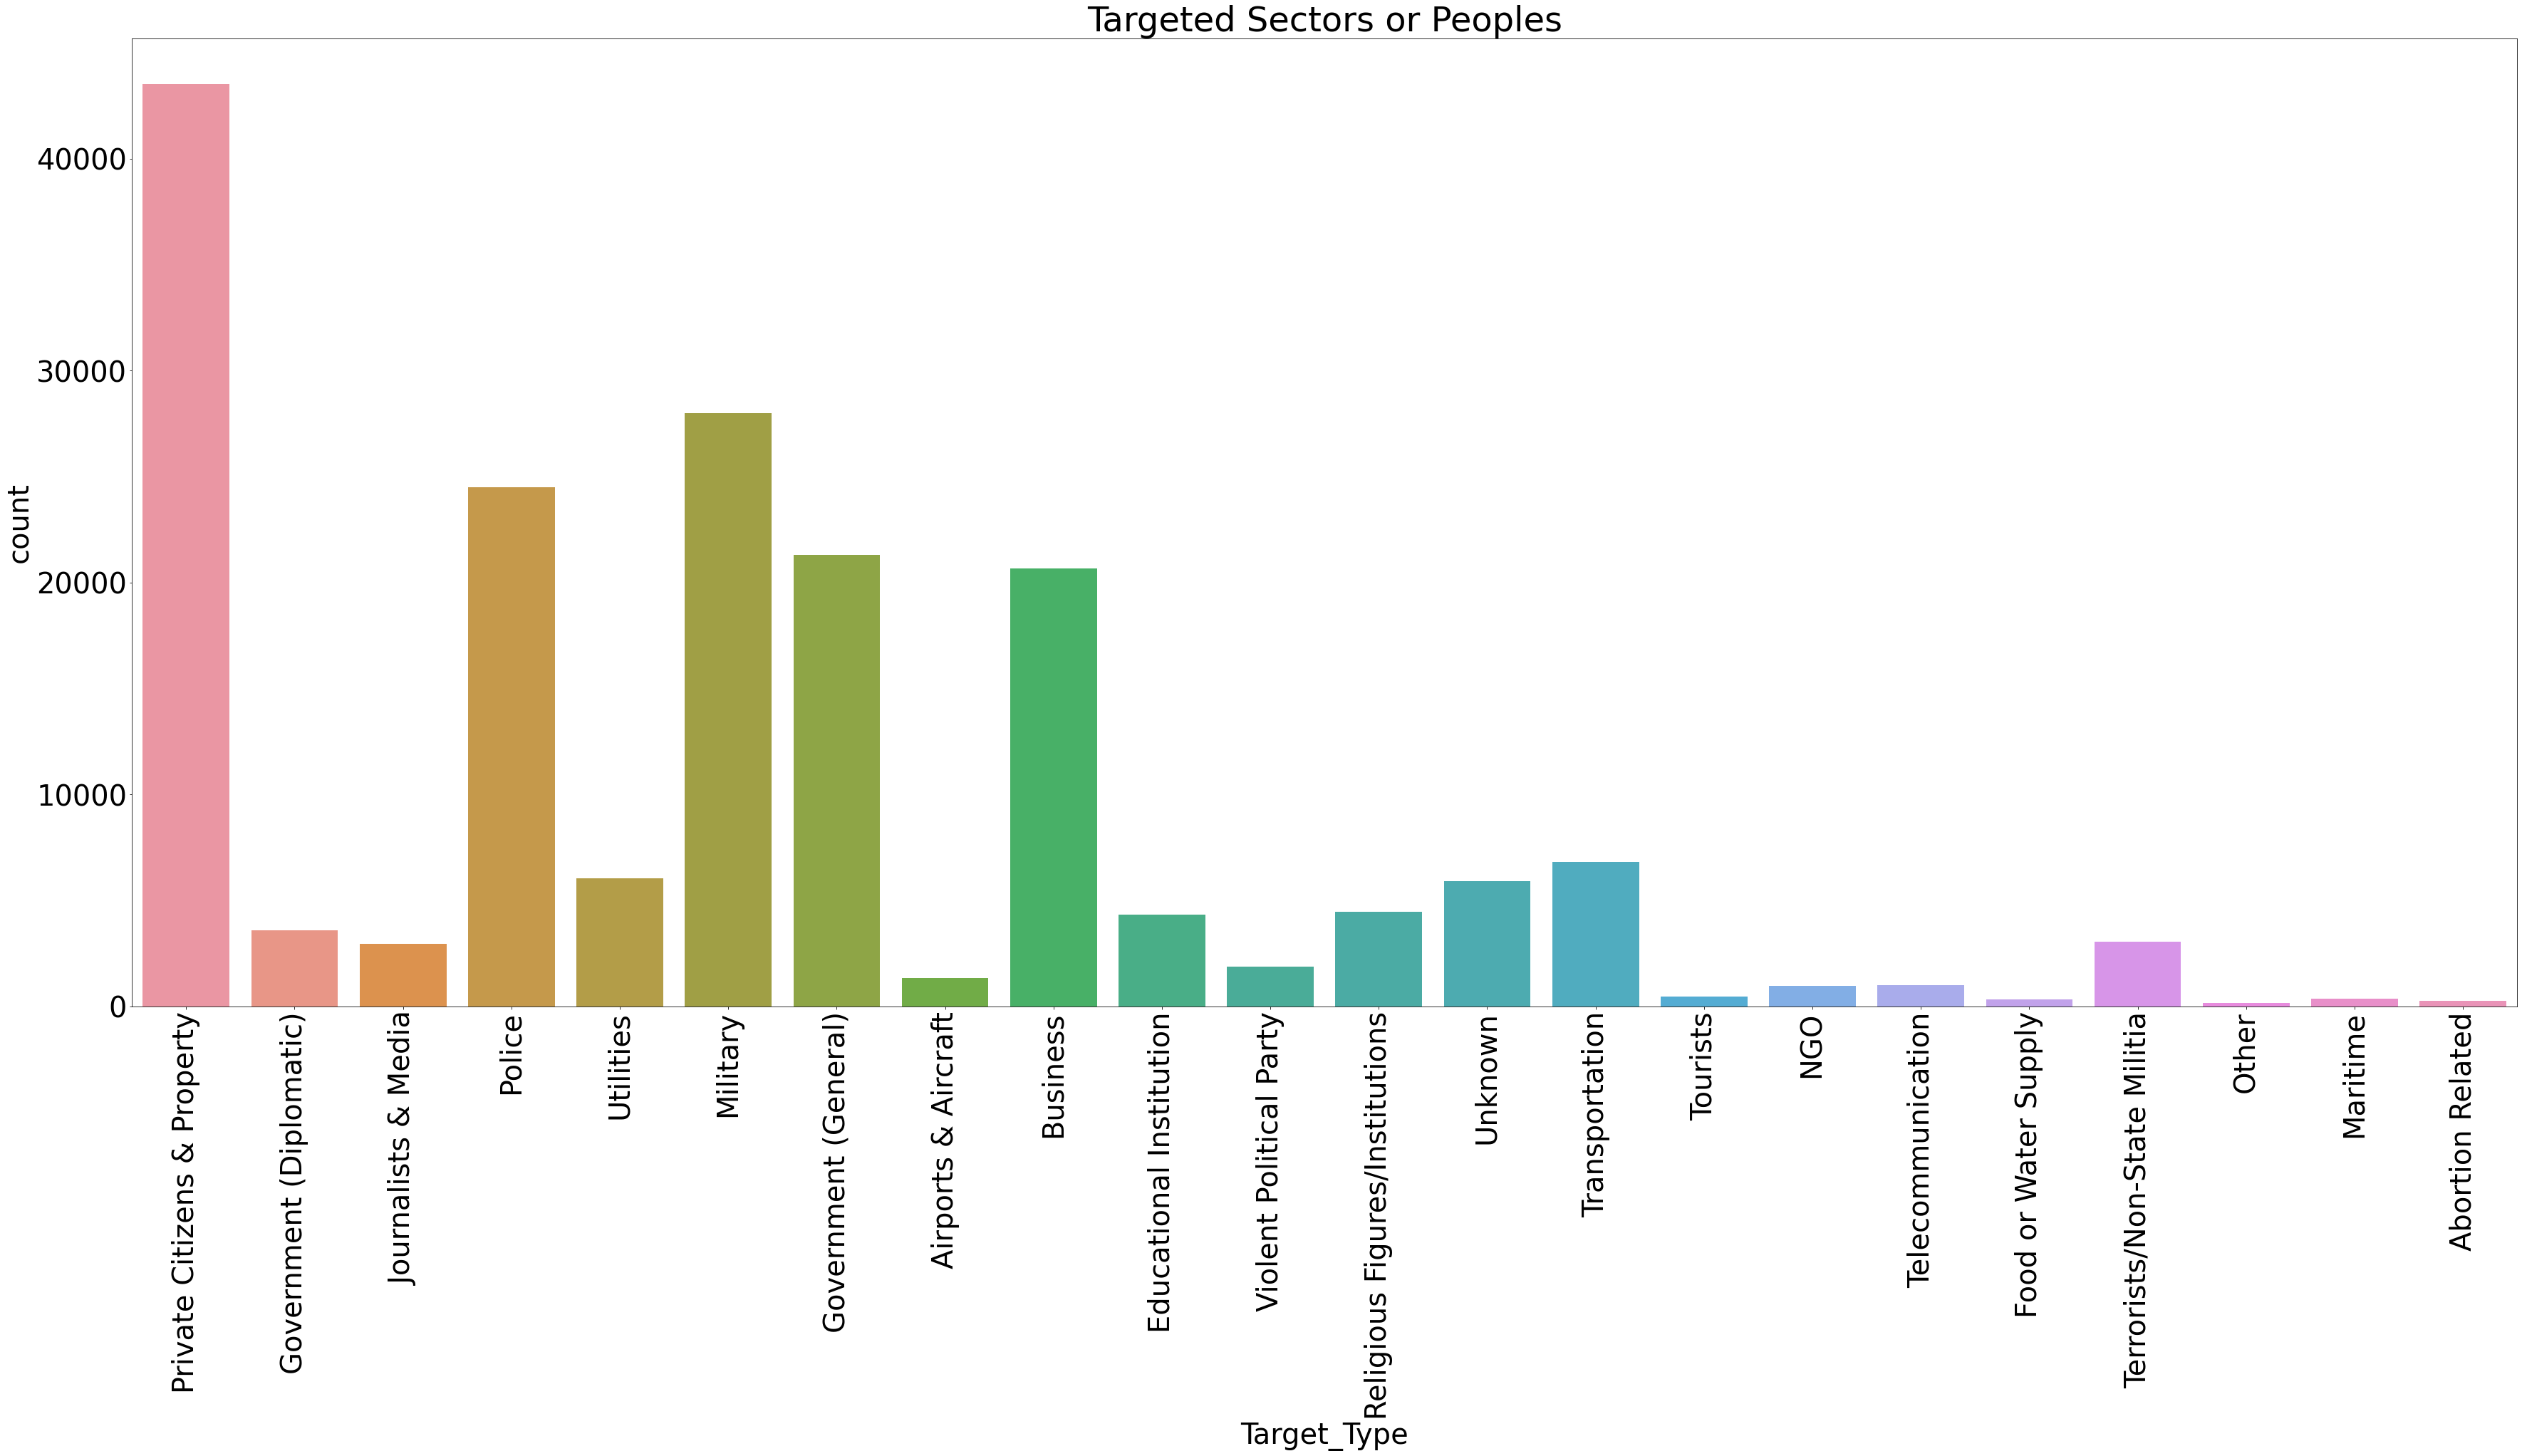

In [ ]:
plt.figure(figsize=(60,25));
plt.rcParams.update({'font.size':40});
plt.xticks(rotation = 90)
plt.title('Targeted Sectors or Peoples')
sns.countplot(x=df.Target_Type)

#Some Common Attack Method Of Terrorists :-

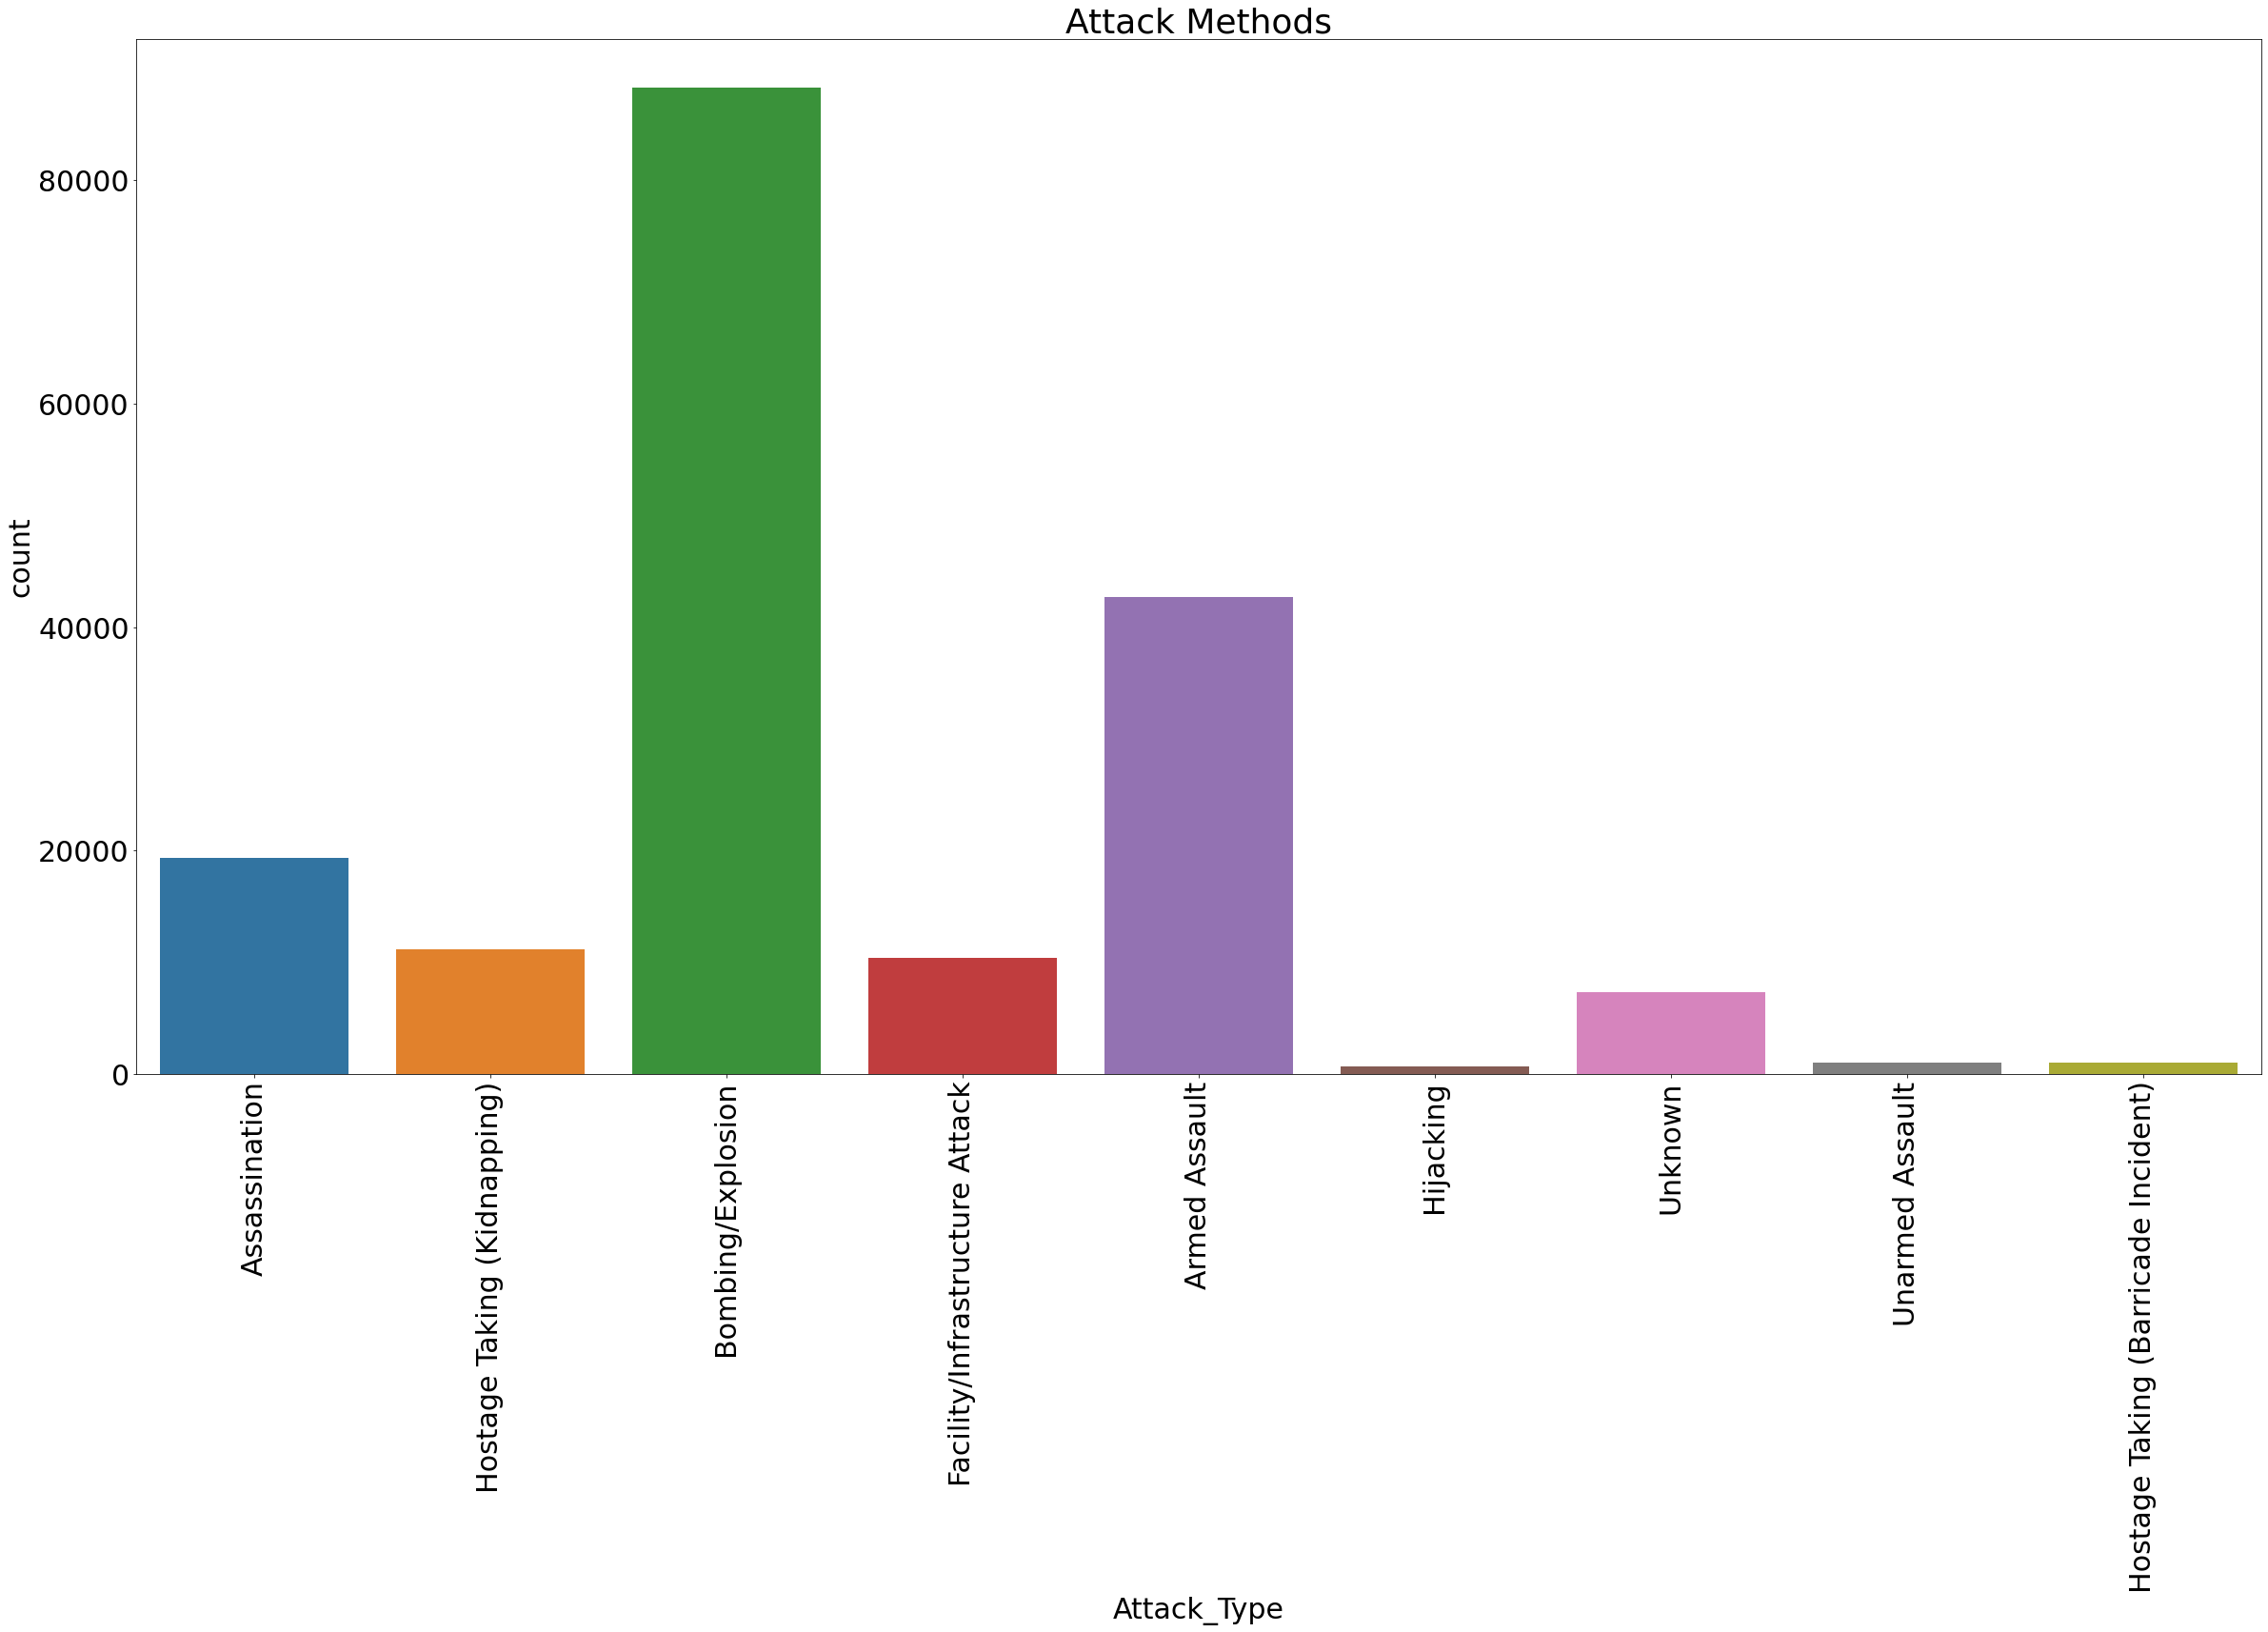

In [ ]:
plt.figure(figsize=(40,20));
plt.rcParams.update({'font.size':30})
plt.xticks(rotation = 90)
plt.title('Attack Methods')
sns.countplot(x=df.Attack_Type)

#Most Used Weapons during Terror Attacks :-

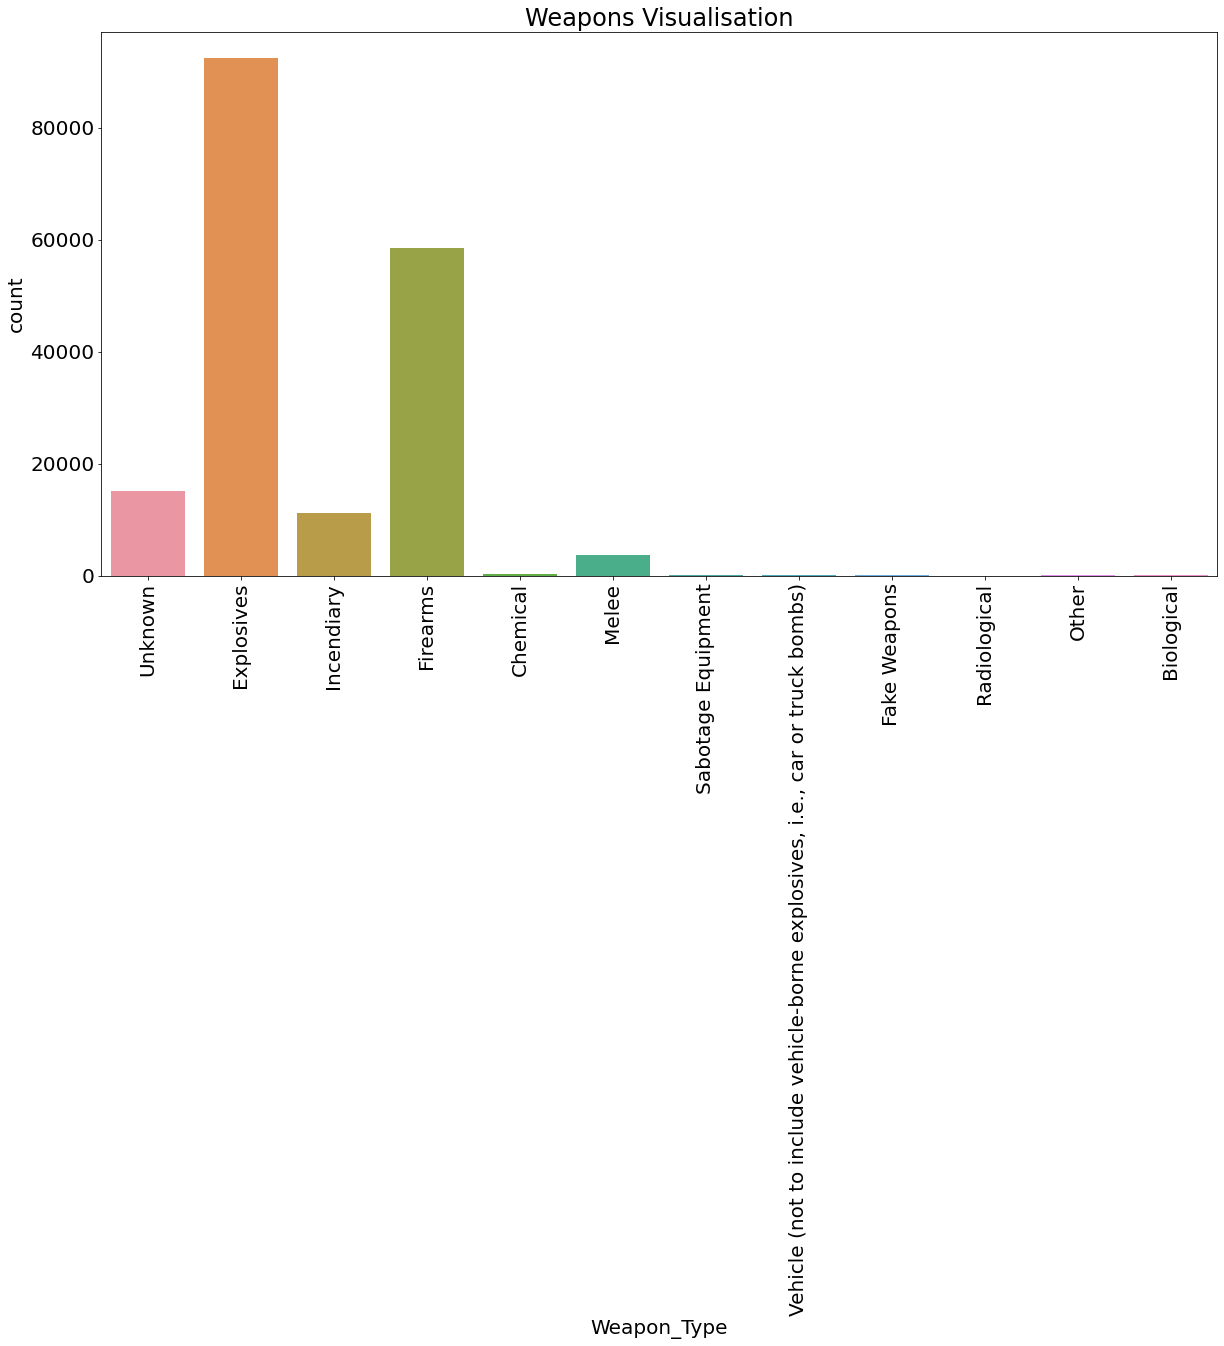

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':20})
plt.xticks(rotation = 90)
plt.title('Weapons Visualisation')
sns.countplot(x=df.Weapon_Type)

# Top Active Terror Groups :-

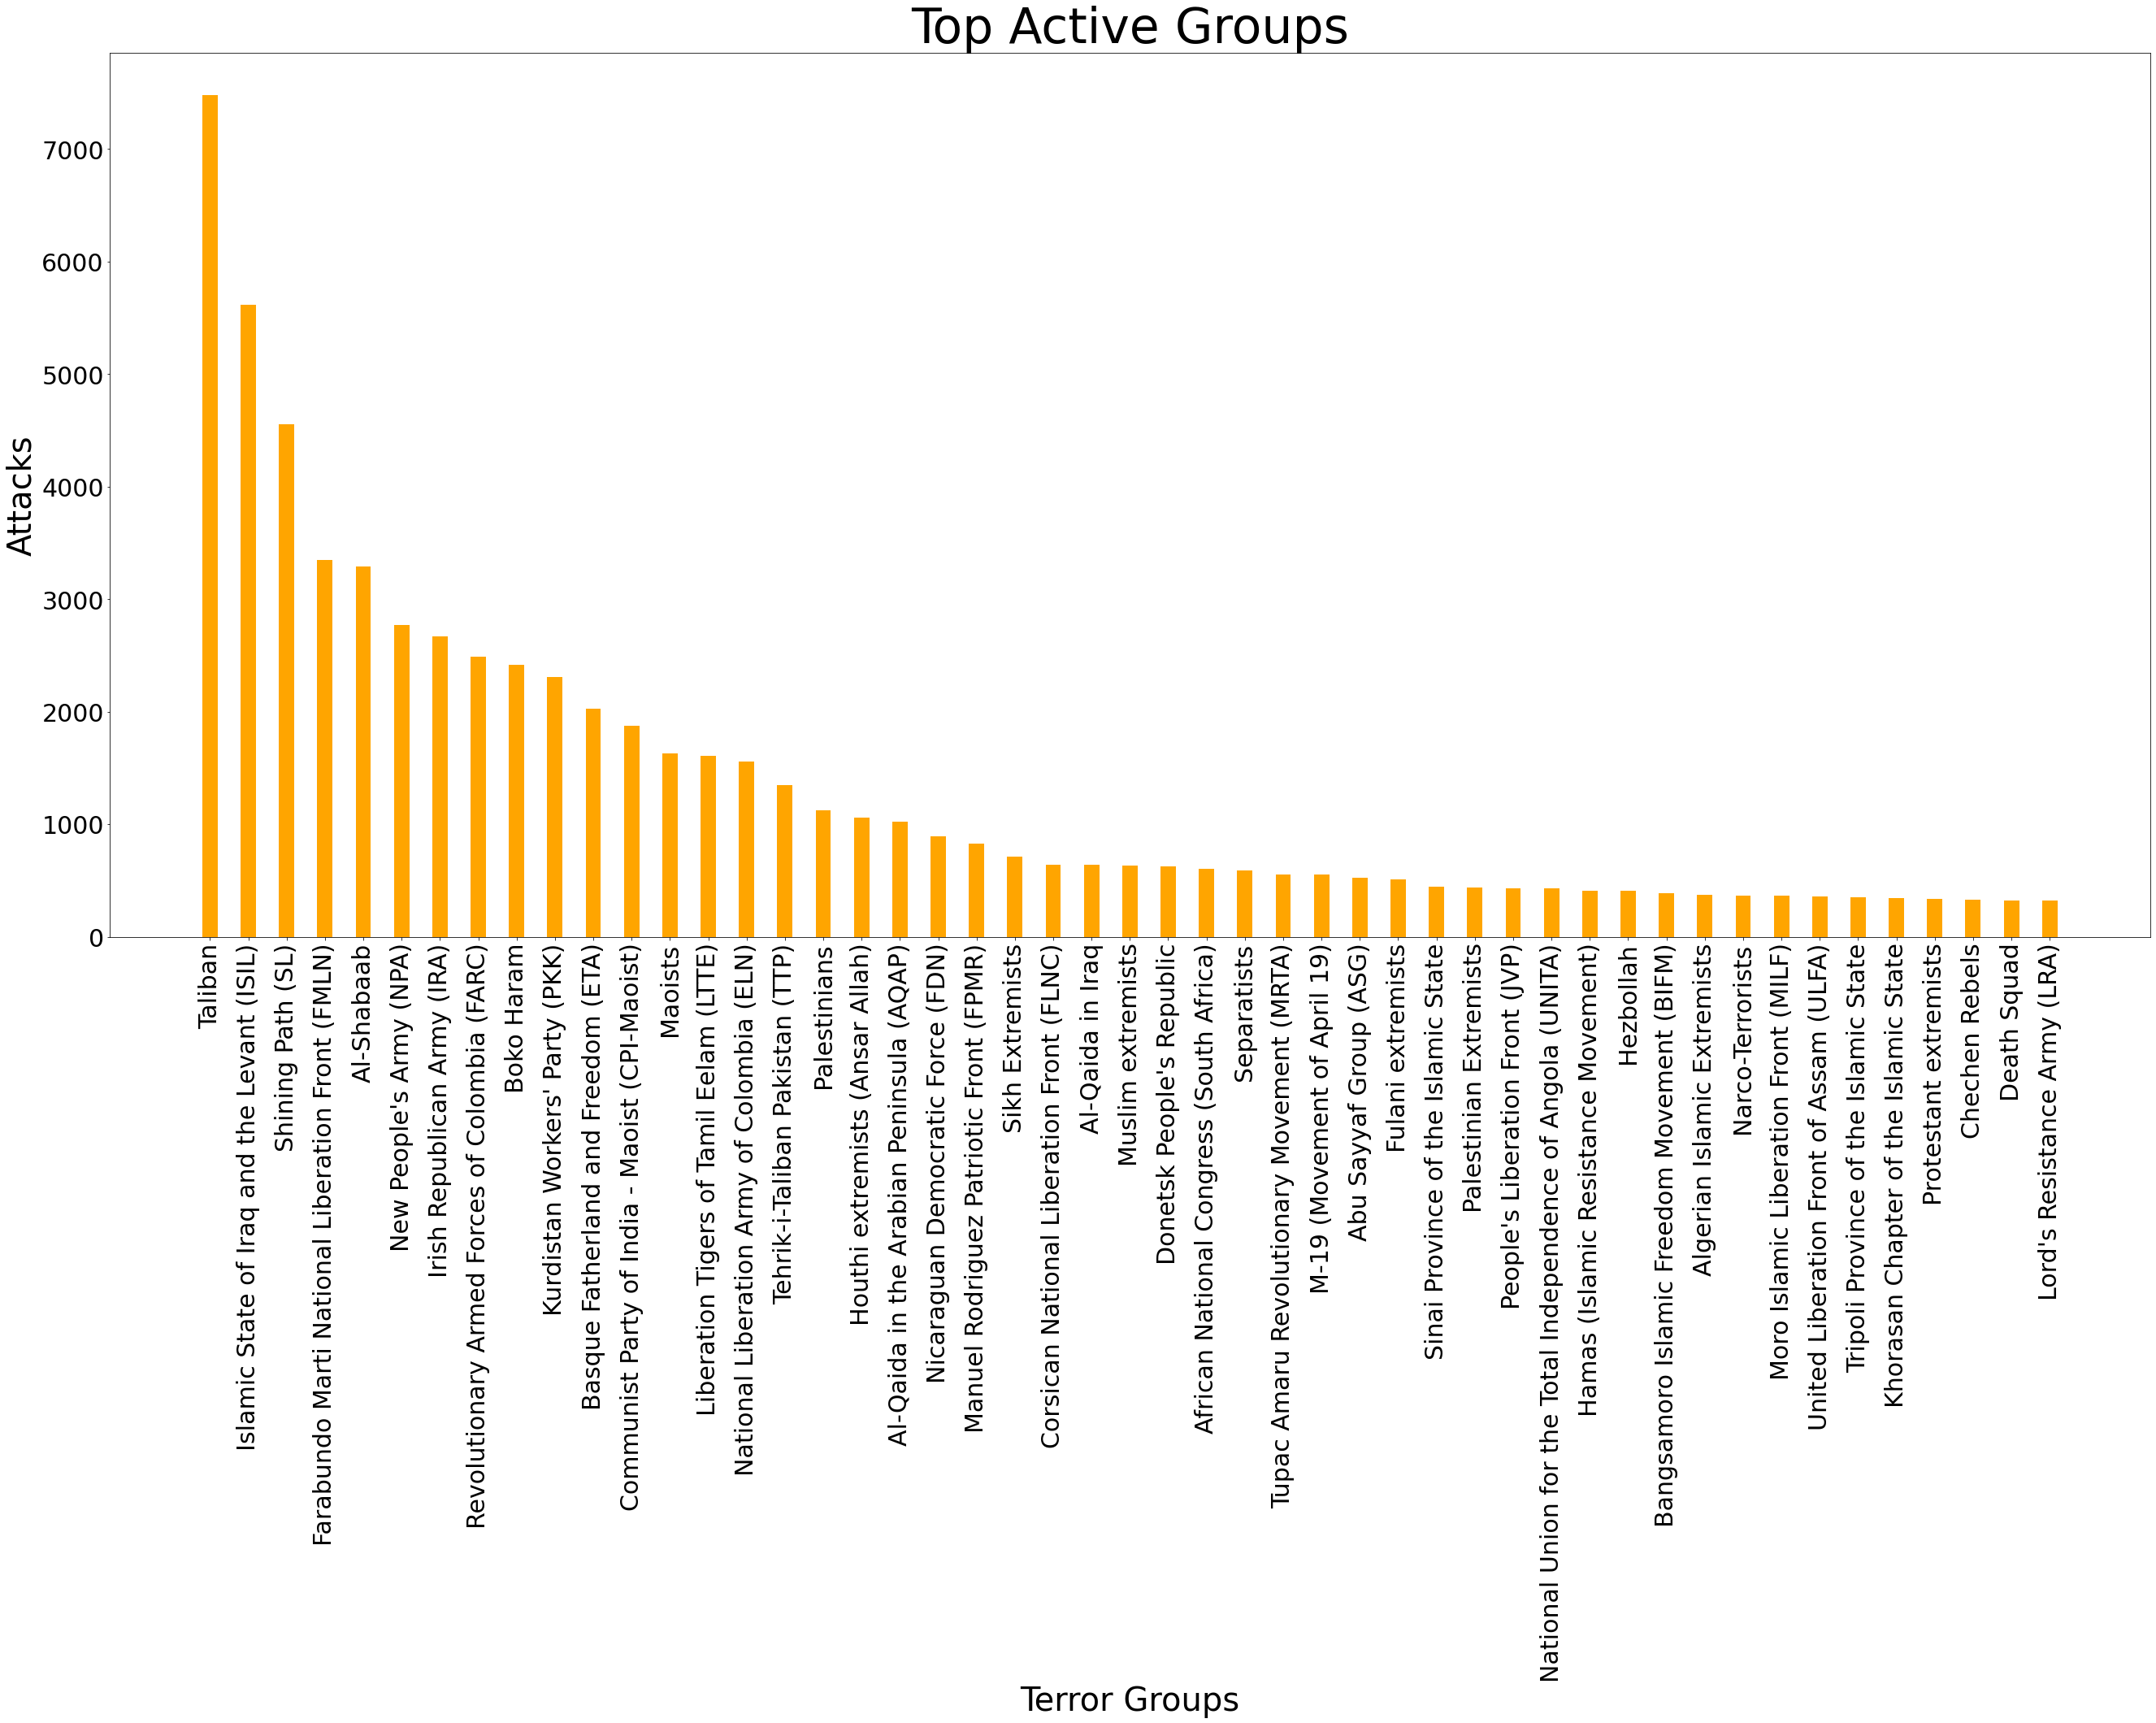

In [ ]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize = (45,20))
plt.bar(df["Group"].value_counts()[1:50].index,
        height = df["Group"].value_counts()[1:50].values,width=0.4,
        color = 'orange')

plt.xticks(rotation=90)

plt.title("Top Active Groups", fontsize=60)
plt.xlabel("Terror Groups", fontsize=40)
plt.ylabel("Attacks", fontsize=40)
plt.show()

#Crime Growth of some Top Terror Groups :-

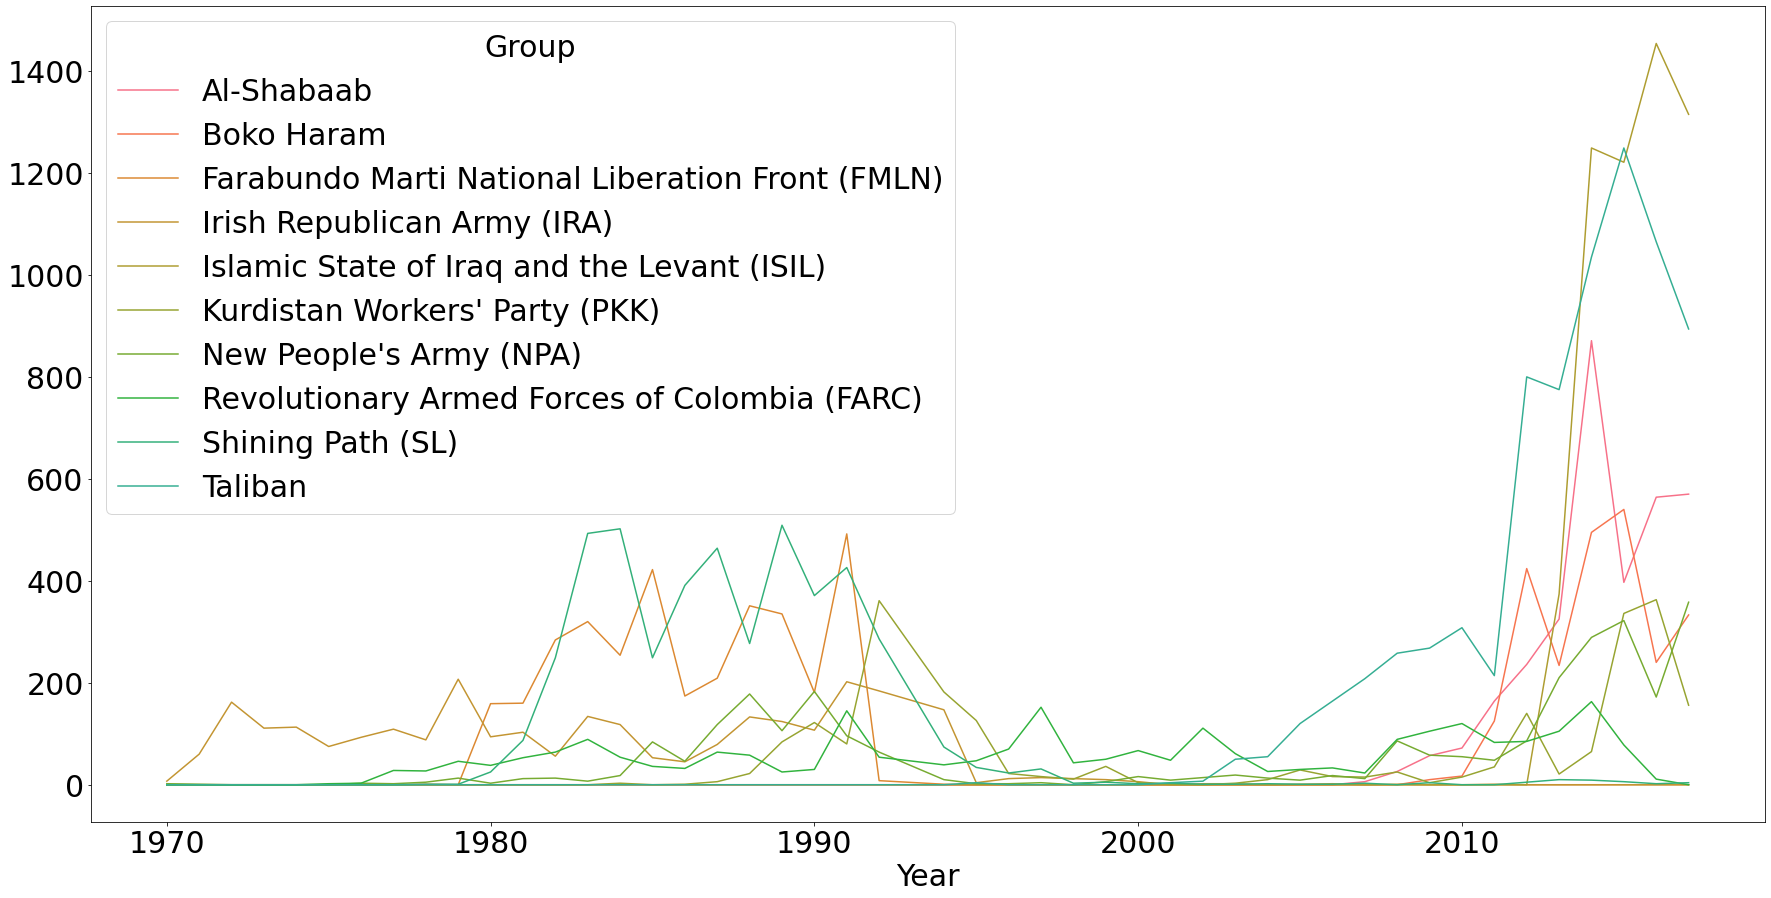

In [ ]:
top_groups=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups.Year,top_groups.Group).plot(color=sns.color_palette('husl',20))
fig=plt.gcf()
fig.set_size_inches(30,15)
plt.show()

#Year-wise Worldwide Growth of Terror :-

In [ ]:
df2=df.groupby(by=["Year"], dropna=False,as_index=False).sum()
colors = ['red'] * 55
colors[43] = 'maroon'
x=df2['Year']
y=df2['Victim']
fig = go.Figure(data=[go.Bar(x=x.tolist(),y=y.tolist(),marker_color=colors)])
fig.update_layout(title_text='Recorded Increase in Terror Attacks every year', xaxis_title="Years",
    yaxis_title="Attacks Per Year ")

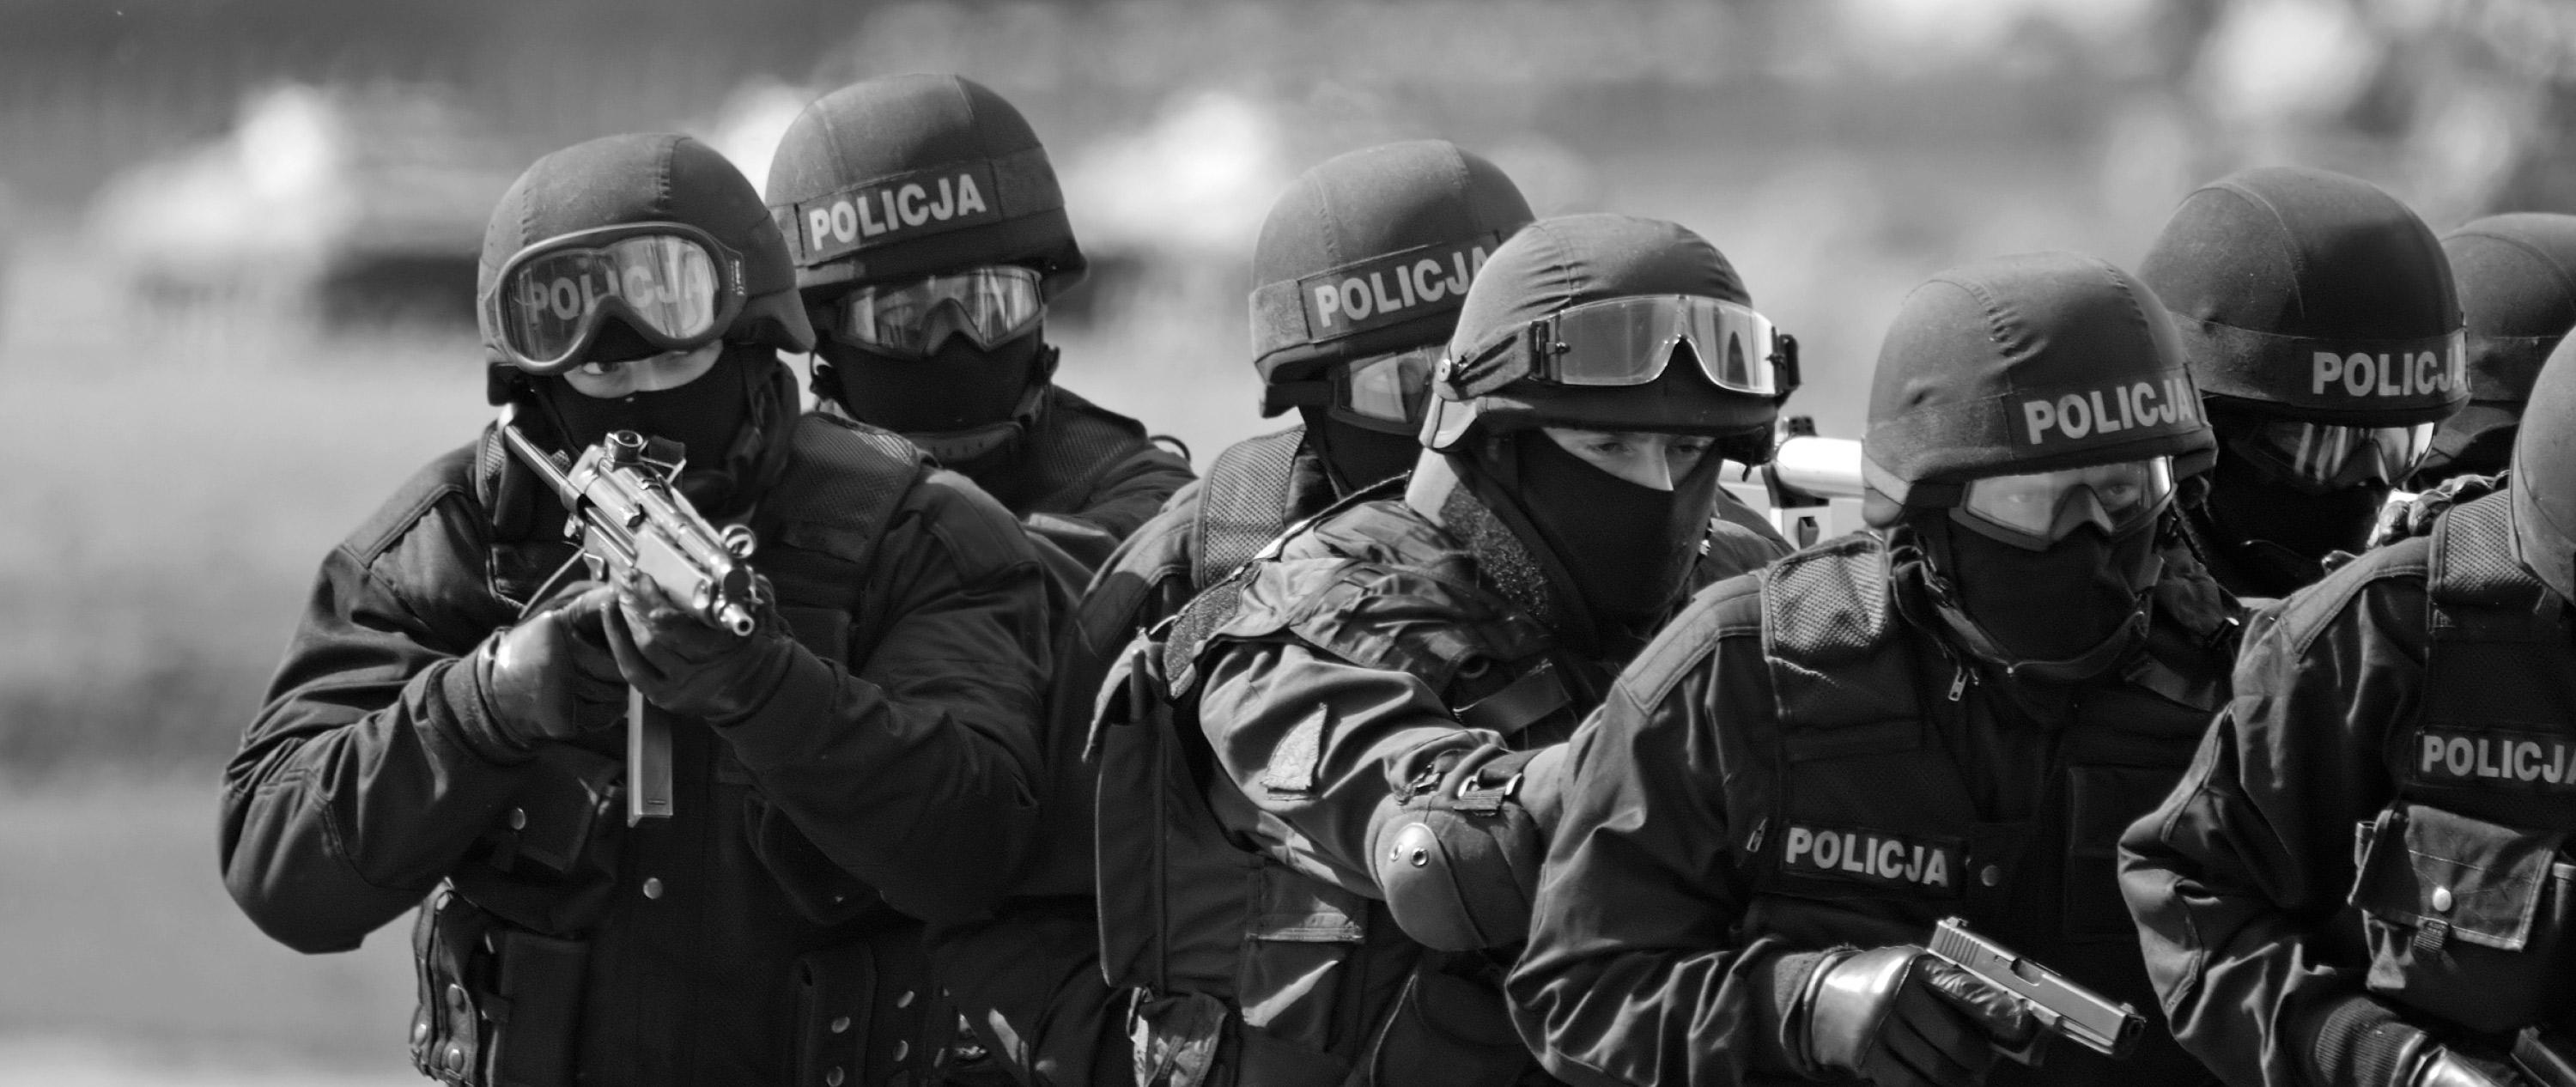

#Summary:

###* Overall Recorded Terror Attacks is around 1,81,690 between 1970 to 2017.

###* The country most prone to terrorist attacks was Iraq, who withstood 24,636 attacks.

###* The city most affected by terror was Baghdad with more than 7200 attacks.

###* Most of the people or sector that are targeted by terrorists are Private Citizens and Property.

###* Bombing/Explosion method used for most Attacks.

###* The group that carried out the most terrorist attacks was the Taliban, which carried out 7478 attacks.

###* The highest jump in terrorist attacks was seen in 2014, with 85618 attacks.

###* Between 1970 and 2017, the death toll went up to 4,11,868 and the injured were 5,23,869.



#Conclusion:

##* The countries with the most attacks such as Iraq, Pakistan, Afghanistan, India, Colombia should all be more alert about security and at the international level, all these countries should be helped by giving security or by giving necessary weapons.


##* Some of the cities that are the most targeted by terrorists such as Baghdad, Karachi, Lima, Mosul, Belfast, all these cities should be put on high alert and special forces should be deployed here, facilities like, medical faculties, Bomb squads, fire brigade should be ready for emergency situations.


##* Terrorists have made most of the target Private Citizens and Property and citizens, Keeping an eye on this , we should extra train the local police and equip them with modern weapons for taking immediate actions.


##* The most used weapon of terrorists is Bomb Explosives, for which the Bomb Squads will have to be ready and at the same time, the governments should also try to educate the common citizens for calm down in such situations and save themselves, their families, and the people around them or to make other help.


##* All terrorist hideouts should be destroyed.


##* The forces will have to be vigilant at the state check-posts as well as keep a special watch on all the congested areas.


##* The supply-chain of terrorist’s weapons will have to be found and broken.


##* And watch out for Suspects also.
